#Ejemplo 13: Series temporales con Keras

##Paso 1: Gestión de los datos

En primer lugar, se cargan las bibliotecas necesarias para la gestión de datos

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**1.1-Carga de datos**

En este caso, los datos están disponibles como un CSV que se carga desde un directorio.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/NSE-TATAGLOBAL.csv")

In [0]:
dataset.head()
#print(len(dataset))

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


Se seleccionan las columnas 1 y 2.

In [0]:
training_set = dataset.iloc[:, 1:2].values

In [0]:
print(len(training_set))
print(training_set)

2035
[[234.05]
 [234.55]
 [240.  ]
 ...
 [121.8 ]
 [120.3 ]
 [122.1 ]]


**1.2-Visualización de los datos**

*   Se puede comprobar la forma que tienen nuestros datos. 

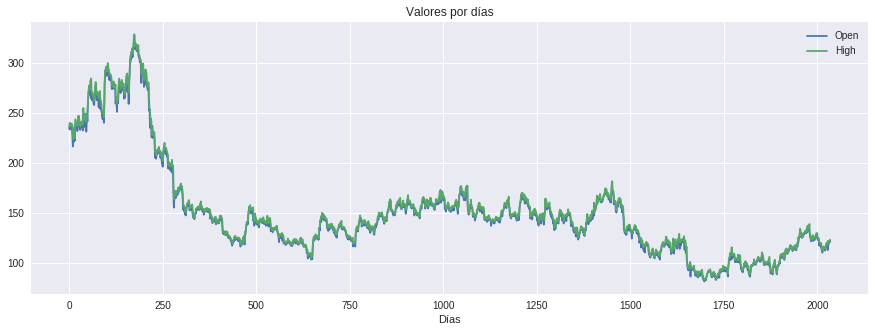

In [0]:
plt.figure(figsize = (15, 5))
plt.plot(dataset.iloc[:, 1].values, label = "Open")
plt.plot(dataset.iloc[:, 2].values, label = "High")
plt.xlabel("Días")
plt.ylabel("")
plt.title("Valores por días")
plt.legend()
plt.show()

**1.3-Codificar los datos**

En este caso los datos son numéricos con lo que sólo requieren procesamiento para escalarlos:

* Los datos ya son numéricos.
* Se realizar una escacla de los datos con MinMax en la zona 0-1, Una ventaja es que se da estabilidad a los datos pero, un problema es que comprime los datos de entrada entre unos límites empíricos (el máximo y el mínimo de la variable). Esto quiere decir que si existe ruido, se va a ampliar.

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
training_set_scaled

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

**1.4-Seleccionar los datos**

En este caso, los datos se separan por la ventana que queremos controlar (60 días).


In [0]:
window_size = 60
X_train = [] #Lista de listas de 60 observaciones
y_train = [] #Lista de valores
for i in range(window_size, len(training_set)):
    X_train.append(training_set_scaled[i-60:i, 0]) #Take [0:60,0] [60:120,0] se generan listas de 60 observaciones
    y_train.append(training_set_scaled[i, 0])#Take [60,0] [120,0]


X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print(len(X_train[0]))


## Paso 2: Arquitectura e implementación de nuestra red


1.   La entrada de nuestra red será una capa con la forma de los datos de entrada.
2.  La función de activación en la capa de salida se establece para que sea un número. 
4. La función de pérdida será  **mse**.
5. La función de optimización **adam**. 


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


## Paso 3:  Entrenamiento

In [0]:
from matplotlib import pyplot
history = regressor.fit(X_train, y_train, epochs = 10, batch_size = 64)
print(history)

Epoch 1/10
1975/1975 [==============================] - 6s 3ms/step - loss: 0.0023
Epoch 2/10
1975/1975 [==============================] - 6s 3ms/step - loss: 0.0022
Epoch 3/10
1975/1975 [==============================] - 6s 3ms/step - loss: 0.0021
Epoch 4/10
1975/1975 [==============================] - 6s 3ms/step - loss: 0.0023
Epoch 5/10
1975/1975 [==============================] - 6s 3ms/step - loss: 0.0020
Epoch 6/10
1975/1975 [==============================] - 6s 3ms/step - loss: 0.0018
Epoch 7/10
1975/1975 [==============================] - 6s 3ms/step - loss: 0.0018
Epoch 8/10
1975/1975 [==============================] - 6s 3ms/step - loss: 0.0019
Epoch 9/10
1975/1975 [==============================] - 6s 3ms/step - loss: 0.0020
Epoch 10/10
1975/1975 [==============================] - 6s 3ms/step - loss: 0.0018


In [0]:
print(history.history)

{'loss': [0.0023194083247239454, 0.002245409493039869, 0.0020821630932343536, 0.0022651717262460462, 0.002011301252766972, 0.0018462412571534515, 0.0018464375247506874, 0.0019472022510216207, 0.0020134318585778715, 0.0018142159509507915]}


## Paso 4:  Test y Predicción

En este caso, se va a validar con el conjunto de test:


*   Se pasa como parámetro el modelo entrenado.
*   Se pasan los valores de entrada y los esperados de salida (X,Y)
*   Se calculan valores para los datos de entrenamiento y de test.
*   Se calcula RMSE (error cuadrático medio). Se busca penalizar tanto los valores por defecto como por exceso. El valor preferente es pequeño indicando que que los valores pronosticados están cerca de los valores observados. 


In [0]:
dataset_test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/tatatest.csv")

In [0]:
real_stock_price = dataset_test.iloc[:, 1:2].values
print(real_stock_price)#Se obtienen los valores reales

[[220.1 ]
 [221.1 ]
 [229.45]
 [230.3 ]
 [237.7 ]
 [237.1 ]
 [229.7 ]
 [226.25]
 [215.  ]
 [215.  ]
 [215.5 ]
 [208.  ]
 [217.  ]
 [223.5 ]
 [230.  ]
 [234.55]]


In [0]:
#Se crea un frame con dos columnas: los valores de entrenamiento y de test
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
print(inputs)
#Se preparan los datos en la forma adecudad
inputs = inputs.reshape(-1,1) #-1-->la forma se infiere
inputs = sc.transform(inputs) #se escalan los datos
X_test = [] #se generan la lista de lista de observaciones
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test) #Se transforma a un array de numpy
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)#Se realiza la predicción obteniendo un array de valores.
print(predicted_stock_price)
predicted_stock_price = sc.inverse_transform(predicted_stock_price) #Se realiza la inversa para obtener el valor real (previamente se habían normalizado los valores de entrada)
print(predicted_stock_price)

In [0]:
import math
from sklearn.metrics import mean_squared_error
print("Valores reales: "+str(real_stock_price))
print("Valores predicción: "+str(predicted_stock_price))
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print("Test data score: %.2f RMSE" % rmse)

Valores reales: [[220.1 ]
 [221.1 ]
 [229.45]
 [230.3 ]
 [237.7 ]
 [237.1 ]
 [229.7 ]
 [226.25]
 [215.  ]
 [215.  ]
 [215.5 ]
 [208.  ]
 [217.  ]
 [223.5 ]
 [230.  ]
 [234.55]]
Valores predicción: [[122.34307]
 [180.81303]
 [211.53223]
 [220.07472]
 [218.1107 ]
 [220.38147]
 [222.57762]
 [220.05727]
 [217.074  ]
 [210.03738]
 [207.07716]
 [207.1181 ]
 [203.19485]
 [205.94505]
 [211.56282]
 [217.28874]]
Test data score: 29.15 RMSE


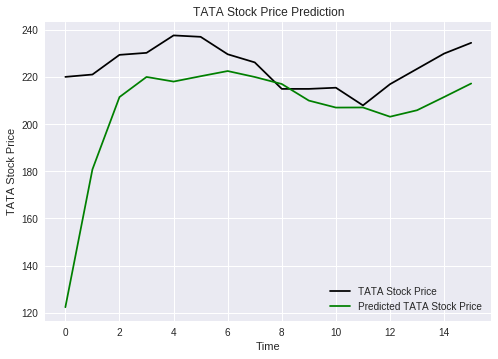

In [0]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()